In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

In [8]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Online Retail.xlsx')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
#Convert the date and time of the dataset
data['InvDt'] = pd.DatetimeIndex(data['InvoiceDate']).date
data['InvHr'] = pd.DatetimeIndex(data['InvoiceDate']).hour
data['InvYr'] = pd.DatetimeIndex(data['InvoiceDate']).year
data['InvMo'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['InvDy'] = pd.DatetimeIndex(data['InvoiceDate']).day
data['total_price'] = data['Quantity']*data['UnitPrice']

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID,InvHr,InvYr,InvMo,InvDy,total_price
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,13.078729,2010.921609,7.553128,15.023096,17.987795
std,218.081158,96.759853,1713.600303,2.443270,0.268787,3.509055,8.664063,378.810824
min,-80995.000000,-11062.060000,12346.000000,6.000000,2010.000000,1.000000,1.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,11.000000,2011.000000,5.000000,7.000000,3.400000
50%,3.000000,2.080000,15152.000000,13.000000,2011.000000,8.000000,15.000000,9.750000
75%,10.000000,4.130000,16791.000000,15.000000,2011.000000,11.000000,22.000000,17.400000
max,80995.000000,38970.000000,18287.000000,20.000000,2011.000000,12.000000,31.000000,168469.600000


In [11]:
data.dropna(inplace=True)
len(data)

406829

In [12]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvDt,InvHr,InvYr,InvMo,InvDy,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2010,12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12,2011,12,9,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12,2011,12,9,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,2011,12,9,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,2011,12,9,16.60


In [13]:
#Create a function that convert the dataframe into groupby informaiton
def pivot_table(dataframe, row_index, val_column, no_record,aggregated_func):
    piv = pd.pivot_table(dataframe,values=val_column, index=row_index, aggfunc= aggregated_func, fill_value=0)
    piv = piv.reset_index()#Resetting index so we can get back a grouped dataframe
    pd.set_option('display.max_colwidth',-1)#Display entaer column data
    piv.sort_values(val_column,ascending=False, inplace=True, axis=0)#Sort by value desc since we want to retive top5
    piv = piv.head(no_record)
    return piv

C:\Users\Dhrupad\AppData\Local\Temp\ipykernel_34088\1214124144.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)#Display entaer column data
C:\Users\Dhrupad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 5 Countries having highest sales')

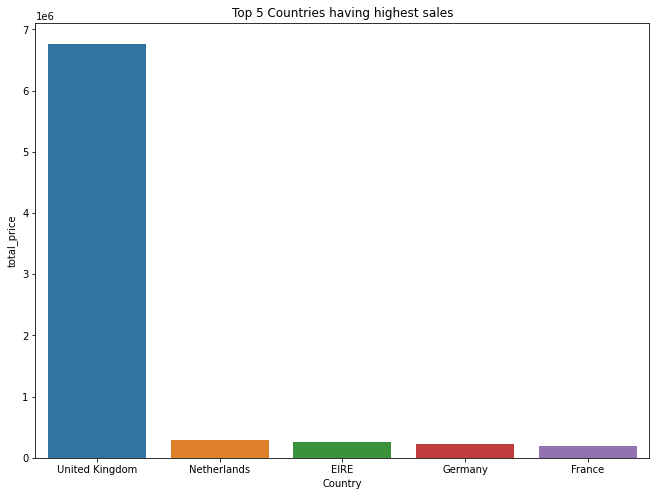

In [20]:
#Setting the axis for the visualization plots
a4_dims = (11,8)
fig, ax = plt.subplots(figsize=a4_dims)
piv=pivot_table(data,row_index='Country',val_column='total_price',no_record=5,aggregated_func=np.sum)
sns.barplot(piv['Country'],piv['total_price'],ax=ax).set_title('Top 5 Countries having highest sales') # The barplot

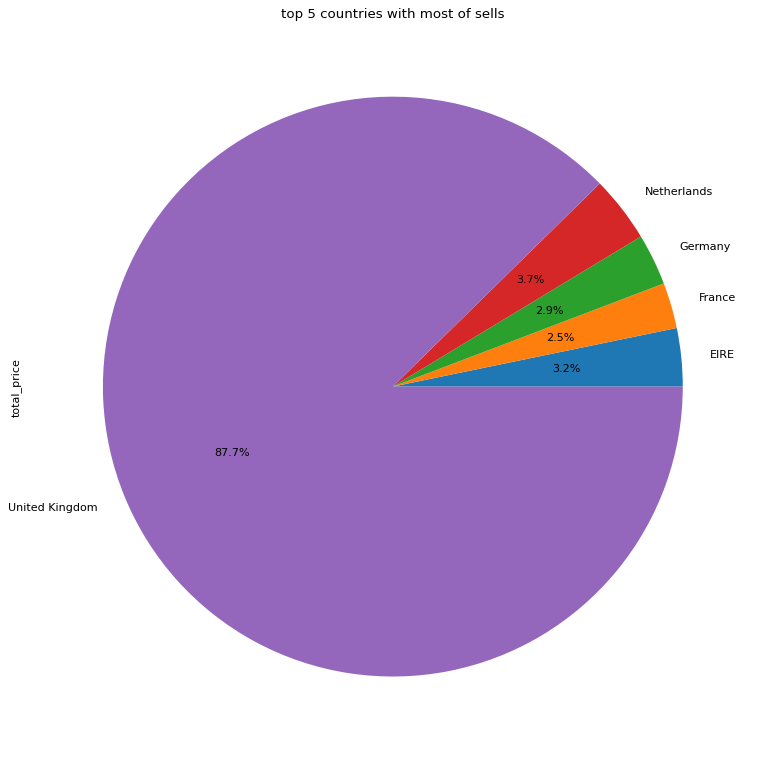

In [35]:
ss = piv.groupby('Country')
y = ss.first()

plt.figure(figsize =(16,12),dpi=80)
plt.title('top 5 countries with most of sells')
z = y['total_price'].plot(kind='pie', autopct='%1.1f%%')
plt.tick_params(axis='x',labelsize=14)
plt.tick_params(axis='y',labelsize=14)
plt.grid(which='major',color='y', linestyle='--')
plt.show()

In [37]:
print(data['Country'].value_counts()*100/len(data['Country']))

United Kingdom          88.950886
Germany                 2.333904 
France                  2.087118 
EIRE                    1.839839 
Spain                   0.622620 
Netherlands             0.582800 
Belgium                 0.508567 
Switzerland             0.461373 
Portugal                0.363789 
Australia               0.309467 
Norway                  0.266943 
Italy                   0.197380 
Channel Islands         0.186319 
Finland                 0.170833 
Cyprus                  0.152890 
Sweden                  0.113561 
Austria                 0.098567 
Denmark                 0.095618 
Japan                   0.087998 
Poland                  0.083819 
USA                     0.071529 
Israel                  0.061451 
Unspecified             0.059976 
Singapore               0.056289 
Iceland                 0.044736 
Canada                  0.037116 
Greece                  0.035887 
Malta                   0.031217 
United Arab Emirates    0.016715 
European Commu

In [43]:
county_info = data['Country'].value_counts()*100/len(data['Country'])

<BarContainer object of 37 artists>

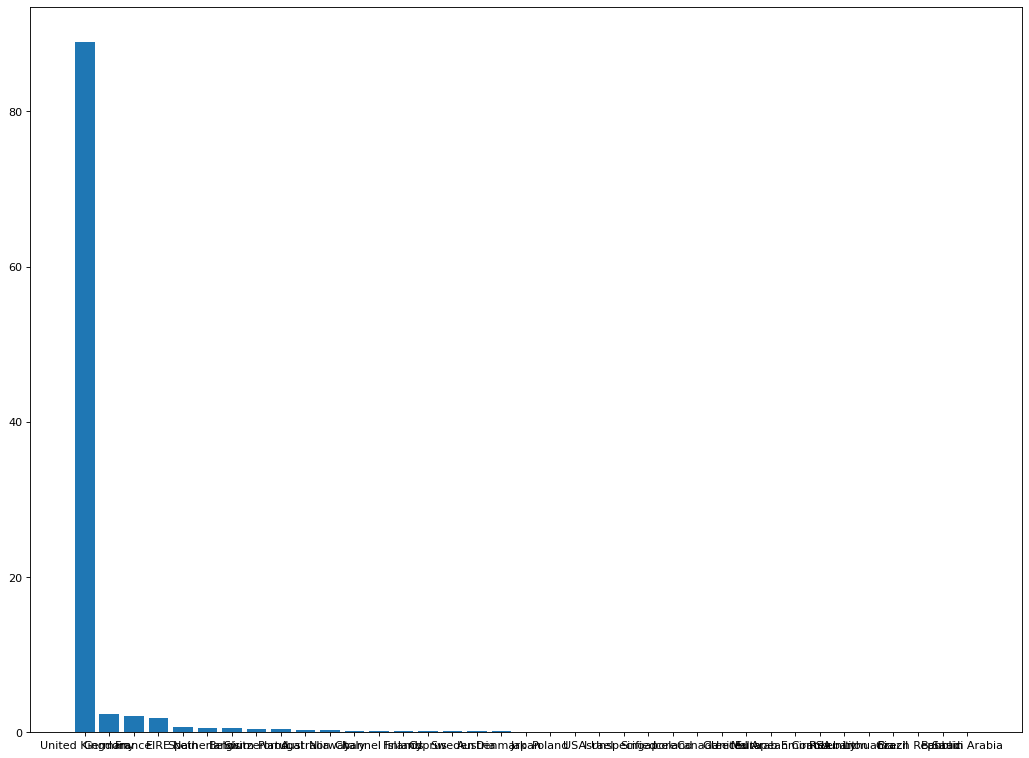

In [60]:
plt.figure(figsize =(16,12),dpi=80)
plt.bar(county_info.keys(),county_info)

In [61]:
uk_df = data[data['Country']=='United Kingdom']

In [62]:
uk_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvDt,InvHr,InvYr,InvMo,InvDy,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8,2010,12,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2010,12,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8,2010,12,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2010,12,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2010,12,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011-12-09,12,2011,12,9,23.40
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011-12-09,12,2011,12,9,23.60
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011-12-09,12,2011,12,9,30.00
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011-12-09,12,2011,12,9,214.80


# Consumer Information

In [69]:
piv = pivot_table(data,row_index='CustomerID', val_column='UnitPrice', no_record=10,aggregated_func=np.sum)
sns.barplot(piv['CustomerID'],piv['UnitPrice'],ax=ax).set_title('Top 10 most happly consumer')

C:\Users\Dhrupad\AppData\Local\Temp\ipykernel_34088\1214124144.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)#Display entaer column data
C:\Users\Dhrupad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 most happly consumer')

# Hot salling products

In [70]:
piv=pivot_table(data,row_index='Description', val_column='UnitPrice',no_record=10, aggregated_func=np.sum)
sns.barplot(piv['Description'],piv['UnitPrice'], ax=ax).set_title('Hot salling product')

C:\Users\Dhrupad\AppData\Local\Temp\ipykernel_34088\1214124144.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)#Display entaer column data
C:\Users\Dhrupad\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Hot salling product')

# Monthly product Salling

In [97]:
piv = pd.pivot_table(data,index=['InvMo','Description'], values='UnitPrice')
product_df = piv.reset_index()

n = product_df.groupby('InvMo').head(5)

n.reset_index()
n.sort_values('InvMo',inplace=True,ascending=True,axis=0)# Sorting by month of the year

n['InvMo']=n['InvMo'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
                           9:'September',10:'October',11:'November',12:'December'})

fig = px.bar(y = n['Description'],x=n['UnitPrice'],animation_frame=n['InvMo'],template='presentation',log_x=True, 
             labels={'x':'Unit sold','y':'Unit Name'})

C:\Users\Dhrupad\AppData\Local\Temp\ipykernel_34088\607880778.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [98]:
fig

# Monthly selling products in UK

In [95]:
piv = pd.pivot_table(uk_df,index=['InvMo','Description'], values='UnitPrice')
product_df = piv.reset_index()

n = product_df.groupby('InvMo').head(5)
n.reset_index()
n.sort_values('InvMo',inplace=True,ascending=True,axis=0)# Sorting by month of the year
n['InvMo']=n['InvMo'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',
                           9:'September',10:'October',11:'November',12:'December'})

fig = px.bar(y = n['Description'],x=n['UnitPrice'],animation_frame=n['InvMo'],template='presentation',log_x=True, 
             labels={'x':'Unit sold','y':'Unit Name'})

C:\Users\Dhrupad\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Dhrupad\AppData\Local\Temp\ipykernel_34088\804564154.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [96]:
fig